# Classification with IRIS

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../Iris.csv")

### Check that the dataframe is received correctly and get information about it

In [6]:
df.head()
#df.tail(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### See and delete the unnecessary columns

In [9]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [10]:
#df = df.drop(labels=df.columns[0],axis=1)

In [11]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Make groups according to the classes

In [13]:
df.groupby("Species").agg(["min","max","std","mean"])

Id                       SepalLengthCm                 \
                 min  max       std   mean           min  max       std   
Species                                                                   
Iris-setosa        1   50  14.57738   25.5           4.3  5.8  0.352490   
Iris-versicolor   51  100  14.57738   75.5           4.9  7.0  0.516171   
Iris-virginica   101  150  14.57738  125.5           4.9  7.9  0.635880   

                       SepalWidthCm                       PetalLengthCm       \
                  mean          min  max       std   mean           min  max   
Species                                                                        
Iris-setosa      5.006          2.3  4.4  0.381024  3.418           1.0  1.9   
Iris-versicolor  5.936          2.0  3.4  0.313798  2.770           3.0  5.1   
Iris-virginica   6.588          2.2  3.8  0.322497  2.974           4.5  6.9   

                                 PetalWidthCm                        
                      std   mean          min  max       std   mean  
Species                                                              
Iris-setosa      0.173511  1.464          0.1  0.6  0.107210  0.244  
Iris-versicolor  0.469911  4.260          1.0  1.8  0.197753  1.326  
Iris-virginica   0.551895  5.552          1.4  2.5  0.274650  2.026

### Find NaN values and fix them

In [21]:
#df.isna()
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [23]:
# Do not take species in loop.
for column in df.columns[0:-1]:
    df[column].fillna(value=df[column].mean(),inplace=True)

df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [24]:
# axis=0 for row and axis=1 for column.
# If how is equal to any, row/column is dropped when even one data is NaN.
# If how is equal to all, row/column is dropped when all datas are NaN.
df.dropna(axis=0,how='any',inplace=True)

## Data Visualization 

In [25]:
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


<AxesSubplot:>

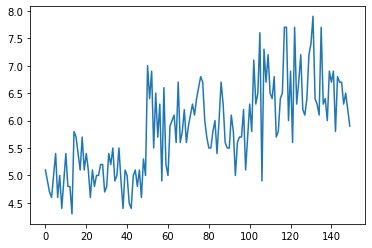

In [28]:
df["SepalLengthCm"].plot()

<AxesSubplot:xlabel='Id', ylabel='SepalLengthCm'>

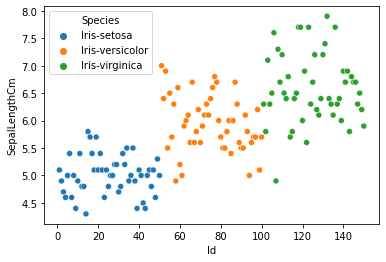

In [30]:
sns.scatterplot(data=df,x=df["Id"],y=df["SepalLengthCm"],hue="Species")

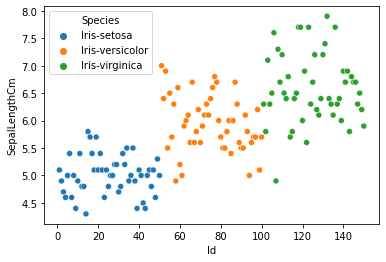

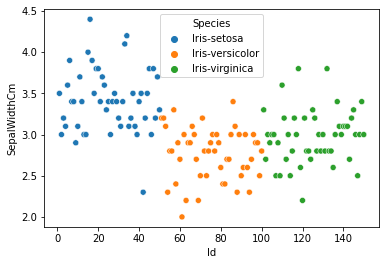

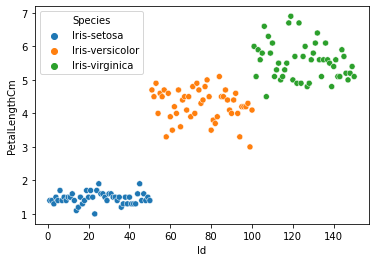

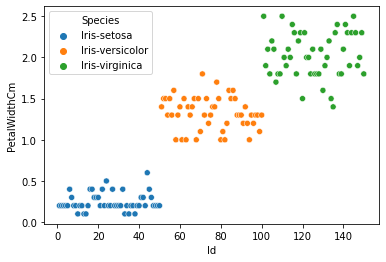

In [33]:
for column in df.columns[1:-1]:
    sns.scatterplot(data=df,x=df["Id"],y=column,hue="Species")
    plt.show()

## Outlier Detection
### 3 STD (Sigma)

In [34]:
selected = df[df["Species"]=="Iris-setosa"]
selected_column = selected["SepalLengthCm"]
std = selected_column.std()
avg = selected_column.mean()

In [35]:
plus = avg + (3 * std)
minus = avg - (3 * std)

In [41]:
((selected["SepalLengthCm"] > plus) | (selected["SepalLengthCm"] < minus))

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
Name: SepalLengthCm, dtype: bool

In [58]:
for column in df.columns[1:-1]:
    for spec in df["Species"].unique():
        selected = df[df["Species"] == spec]
        selected_column = selected[column]
        
        std = selected_column.std()
        avg = selected_column.mean()
        
        plus = avg + (3 * std)
        minus = avg - (3 * std)
        
        outliers = ((selected[column] > plus) | (selected[column] < minus))
        #df.drop(index=outliers, inplace=True)
        
        print(outliers)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
Name: SepalLengthCm, dtype: bool
50    False
51    False
52    False
53    False
54    False
55    False
56    False
57    False
58    False
59    False
60    False
61    False
62    False
63    False
64    False
65    False
66    False
67    False
68    False
69    False
70    False
71    False
72    False
73    False
74    False
75    False
76    False
77    False
78    False
79    False
80    F

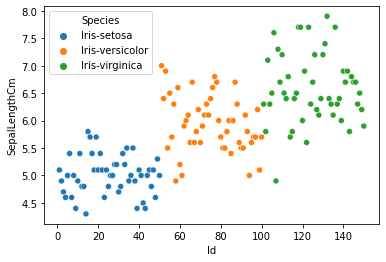

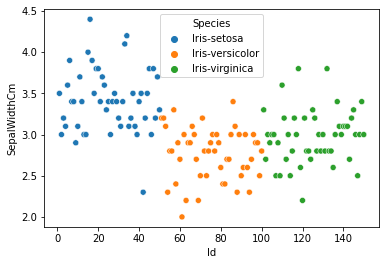

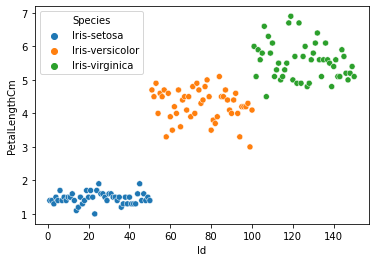

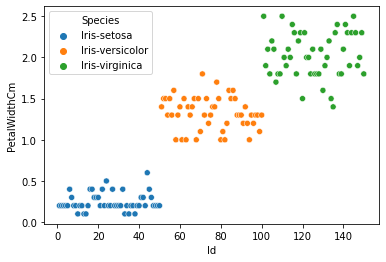

In [59]:
for column in df.columns[1:-1]:
    sns.scatterplot(data=df,x=df["Id"],y=column,hue="Species")
    plt.show()

In [60]:
df.to_csv("final_Iris.csv")